<a href="https://colab.research.google.com/github/youavang/inaugural_speech_nlp/blob/main/NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

## Introduction

First, we will be analyzing the sentiment of the overall speech. Then, second, throughout time during the speech. We will be using textblob module and sentiment labels.

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

In [1]:
# Mount to Google Drive to access saved files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Overall Sentiment of Speech

In [3]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('/content/drive/MyDrive/pickle/corpus.pkl')
data

,transcript,full_name
bush,Help inform the discussion George W. Bush Ja...,George W. Bush
clinton,Help inform the discussion Bill Clinton Janu...,Bill Clinton
obama,Help inform the discussion Barack Obama Janu...,Barack Obama
trump,Help inform the discussion Donald Trump Janu...,Donald Trump


In [4]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
bush,Help inform the discussion George W. Bush Ja...,George W. Bush,0.184050,0.462225
clinton,Help inform the discussion Bill Clinton Janu...,Bill Clinton,0.157335,0.513506
obama,Help inform the discussion Barack Obama Janu...,Barack Obama,0.087652,0.467868
trump,Help inform the discussion Donald Trump Janu...,Donald Trump,0.153381,0.398333


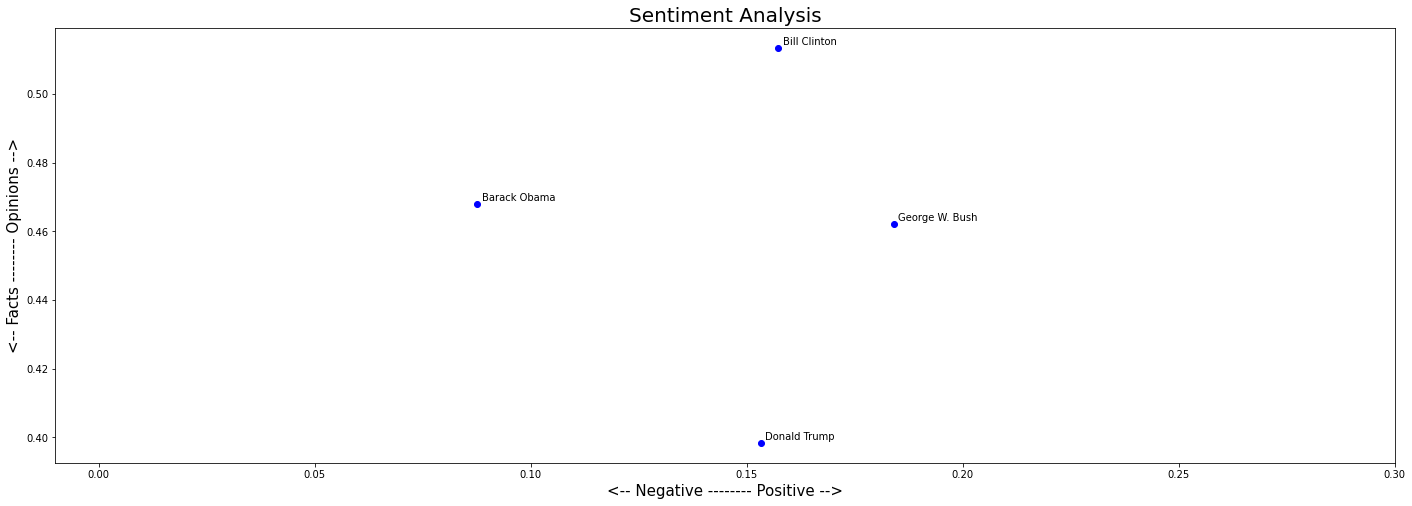

In [10]:
# Let's plot the results
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [24, 8]

for index, president in enumerate(data.index):
    x = data.polarity.loc[president]
    y = data.subjectivity.loc[president]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .30) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Speech Over Time

Now we're going to analyze if there's anything interesting about the sentiment over time throughout each speech.

In [11]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [13]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Help inform the discussion   George W. Bush January 20, 2001 George W. Bush delivers his inaugural address following his election to the first of his two Presidential terms.\xa0 The President recognizes and thanks his 2000 Presidential Election opponent, Vice President Al Gore, who contested Bush’s victory until a recount of Florida’s votes took place, the critical state in the Electoral College tally.\xa0 Bush also promises reductions in taxes, reforms in Social Security, Welfare and education, increases in defense, and intolerance of weapons of mass destruction. President Clinton, distinguished guests and my fellow citizens, the peaceful transfer of authority is rare in history, yet common in our country. With a simple oath, we affirm old traditions and make new beginnings.\r\nAs I begin, I thank President Clinton for his service to our nation.\r\nAnd I thank Vice President Gore for a contest conducted with spirit and ended with grace.\r\nI am honored and humble',
  "d to stand he

In [14]:
# The list has 10 elements, one for each transcript
len(list_pieces)

4

In [15]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [16]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.06414141414141415,
  0.12073863636363637,
  0.15051020408163263,
  0.2793123543123543,
  0.17603305785123965,
  0.07575757575757577,
  0.16666666666666666,
  0.2538352272727273,
  0.20920745920745917,
  0.32666666666666666],
 [0.25666666666666665,
  0.027840909090909083,
  0.21145276292335113,
  0.13605442176870747,
  0.30227272727272725,
  0.14529914529914528,
  0.09483901515151516,
  0.19125874125874126,
  0.08285123966942148,
  0.04444444444444444],
 [0.002619047619047632,
  0.03658459595959596,
  0.16747419247419248,
  0.07995867768595041,
  0.010256410256410251,
  0.16705387205387207,
  -0.06748251748251748,
  0.15104166666666669,
  0.17735690235690232,
  0.15],
 [0.31,
  0.13425324675324674,
  0.0673469387755102,
  0.2800751879699248,
  -0.029166666666666667,
  0.08845398428731761,
  0.17696715049656225,
  0.18656299840510368,
  0.12533670033670033,
  0.2641156462585034]]

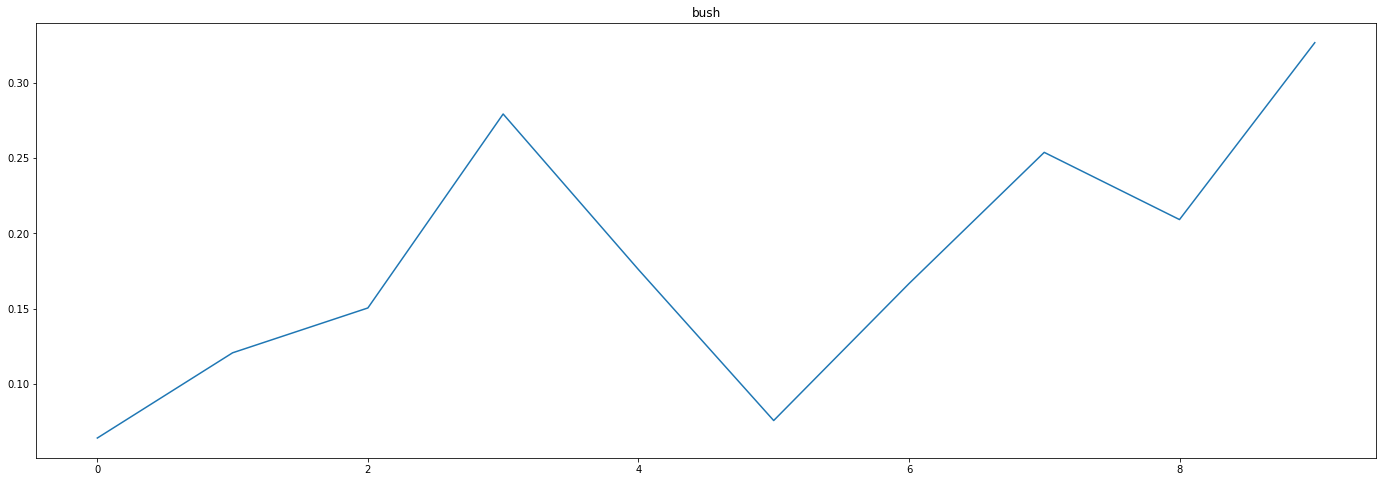

In [17]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

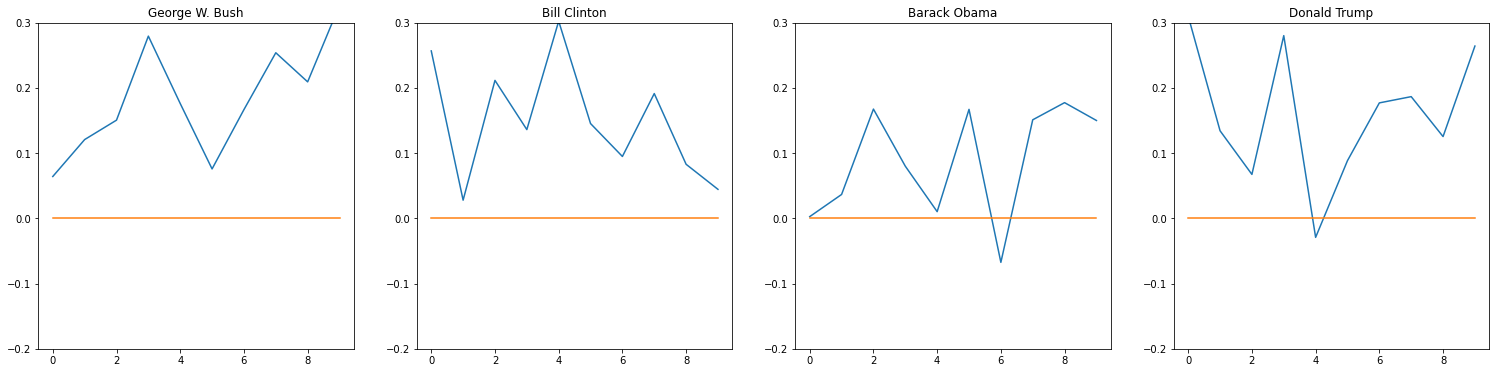

In [23]:
# Show the plot for all presidents
plt.rcParams['figure.figsize'] = [26, 6]

for index, presidentn in enumerate(data.index):    
    plt.subplot(1, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()